In [14]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import *
from pymatgen.io.cif import *
from pymatgen.core.operations import *
from tabulate import tabulate
from pymatgen.symmetry.site_symmetries import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pymatgen.analysis.diffraction.xrd import *
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure import plotter
import numpy as np

In [15]:
USER_API_KEY = "VE2Z5ZyFtdd4NPJ6F"
with MPRester(USER_API_KEY) as m:
    structure = m.get_structure_by_material_id("mp-568662")
    bandstructure = m.get_bandstructure_by_material_id("mp-568662")

In [16]:
bandgap = bandstructure.get_band_gap()

## Déterminer la bande interdite

In [17]:
print("Énergie de la bande interdite : ",str(bandgap.get('energy'))+" eV")
print("Bande interdite directe ? : ", str(bandgap.get('direct')))
print("Transition: la direction ", bandgap['transition'], "de la zone de Brillouin du cristal")

Énergie de la bande interdite :  5.4291 eV
Bande interdite directe ? :  False
Transition: la direction  X-\Gamma de la zone de Brillouin du cristal


La bande interdite n'est pas directe et est supérieur à 1-2 eV, on est dans le cas d'un matériaux isolant 
(from https://fr.wikipedia.org/wiki/Théorie_des_bandes)

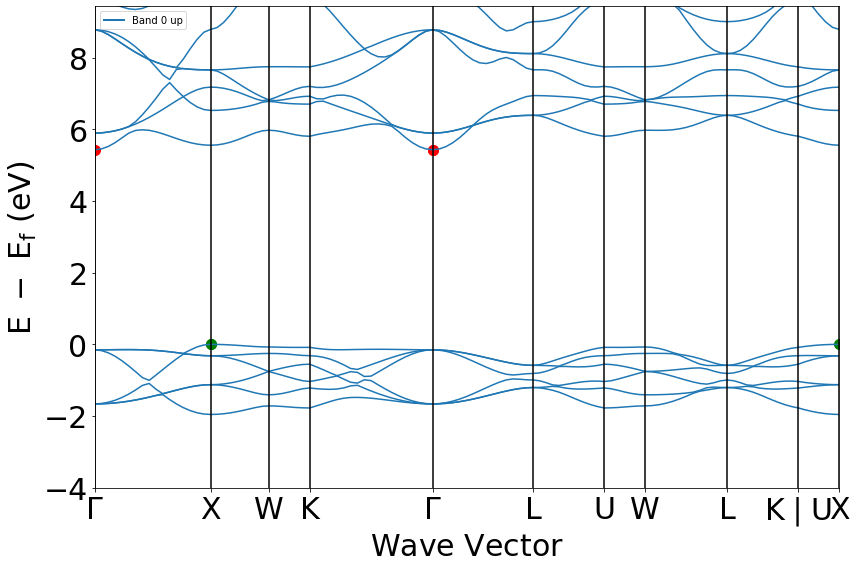

In [18]:
plot = BSPlotter(bandstructure).get_plot(vbm_cbm_marker=True)
plot.show()

## Trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion (insérer une figure indiquant la dispersion par des flèches),

Rappels : 
- Conduction Band Minimum (CBM) = bande contenant le minimum de la bande de valence
- Valence Band Maximum (VBM) =  bande contenant le maximum de la bande de valence


In [19]:
cbm = bandstructure.get_cbm()
print("Premiere bande de conduction ")
print("Bande contenant le CBM",str(cbm.get('band_index')))

Premiere bande de conduction 
Bande contenant le CBM defaultdict(<class 'list'>, {<Spin.up: 1>: [12]})


#### La bande 12 est donc la première bande de valence.

In [20]:
vbm = bandstructure.get_vbm()
print("Derniere bande de condution")
print("Bande contenant le VBM : ",str(vbm.get('band_index')))

Derniere bande de condution
Bande contenant le VBM :  defaultdict(<class 'list'>, {<Spin.up: 1>: [11]})


#### La bande 11 est donc la dernière bande de valence.

Graphe représentant les dispersion max/min dans la bande de valence à l'aide de flèche
La plus grande dispersion dans la dernière bande de valence a lieu dans la direction : L - U (flèche verte à droite)
La plus petite dispersion dans la dernière bande de valence a lieu dans la direction : Γ - X (flèche verte à gauche)

La plus grande dispersion dans la première bande de conduction a lieu dans la direction : Γ - L (flèche rouge à droite)
La plus petite dispersion dans la première bande de conduction a lieu dans la direction : Γ - X (flèche rouge à gauche) 


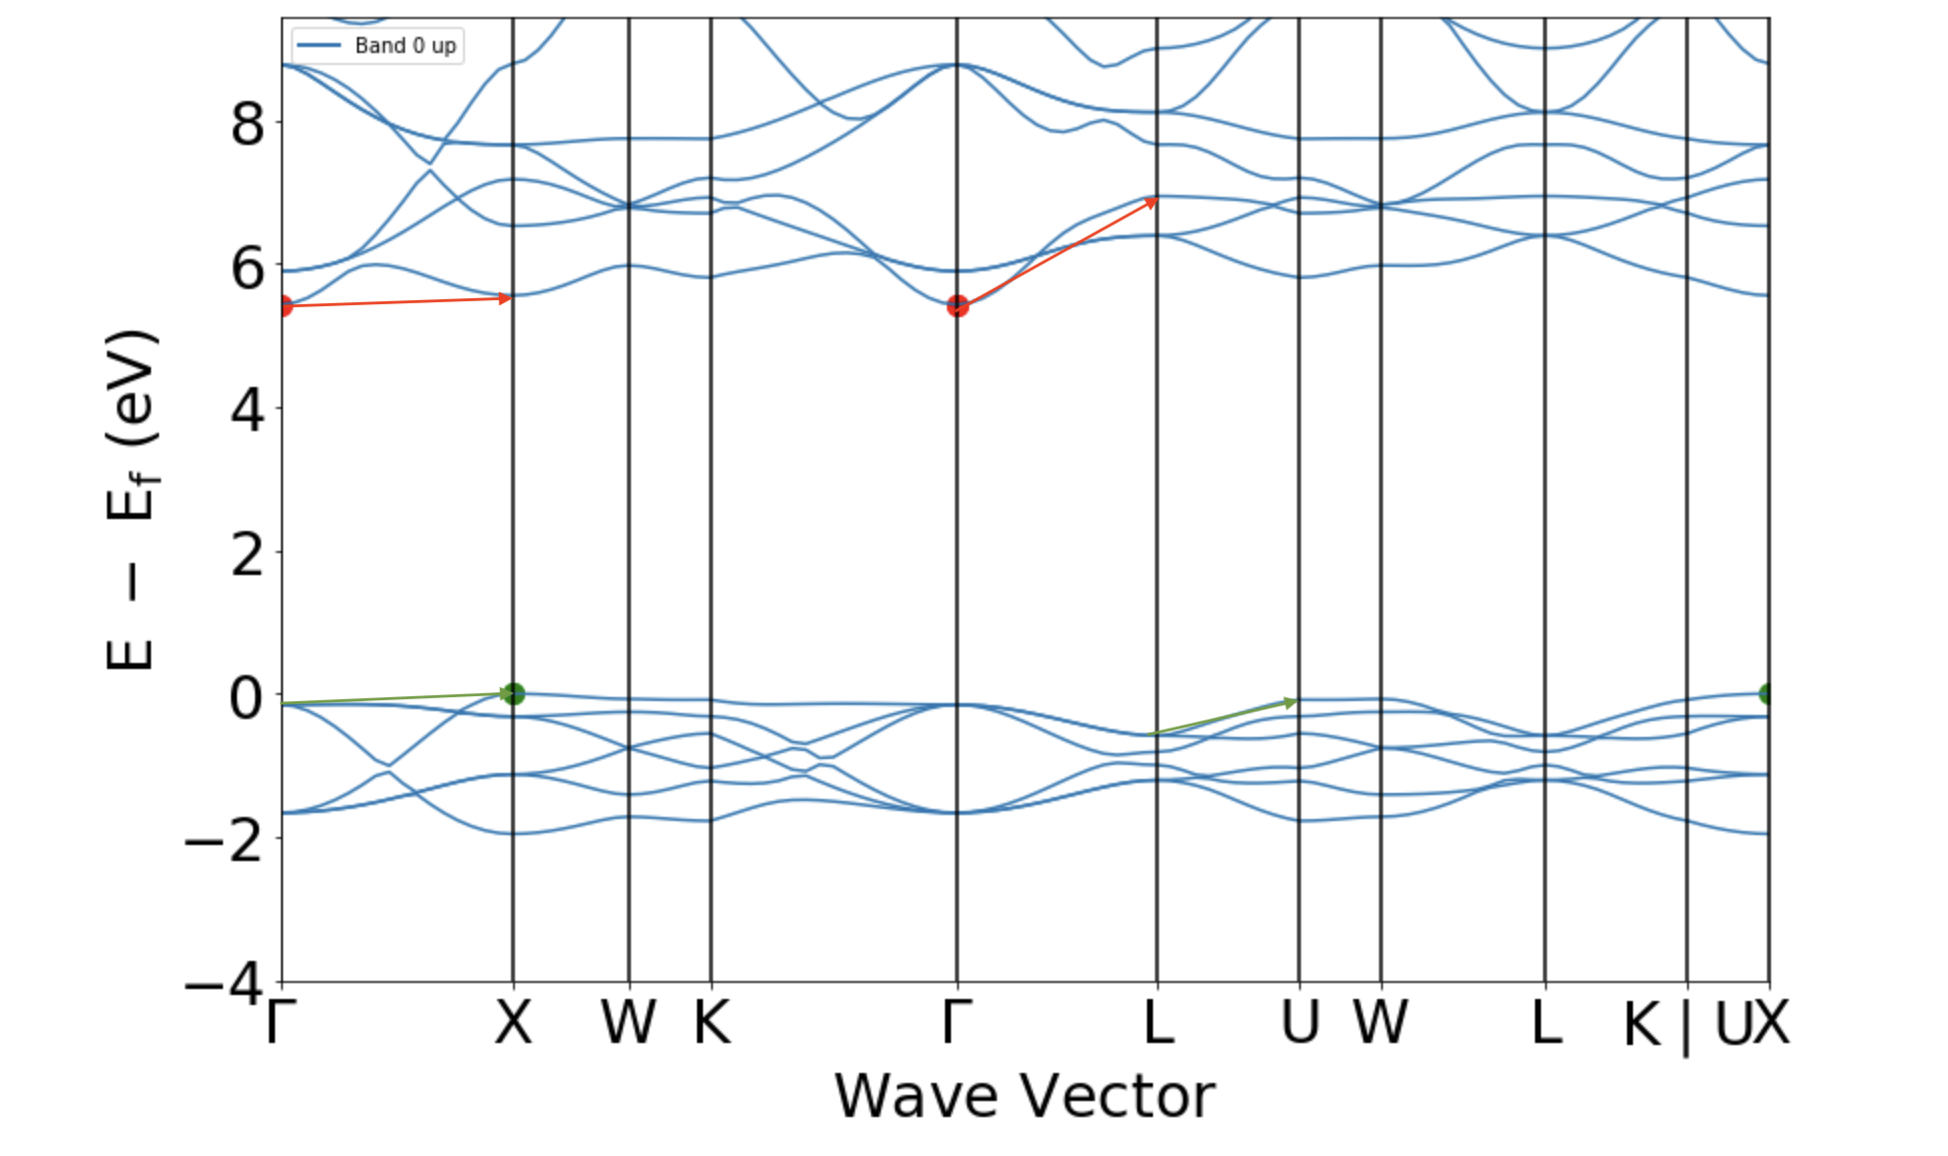

## Calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique

In [31]:
plot = plotter.BSPlotter(bandstructure)
data = plot.bs_plot_data()
E = data.get('energy')
D = data.get('ticks').get('distance')
PBragg = [D[0], D[1], D[3], D[4], D[6], D[8], D[9], D[11], D[13], D[14]]
Vidx = 11


print("Calculons la masse effective au sommet de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.")
print("Connaissant le sommet(α,β) et un point, on peut retrouver l'équation de la parabole : y = a(x-α)^2 + β\n")

x1, y1 = PBragg[3], E.get('1')[3][Vidx][0] 
x2, y2 = PBragg[2], E.get('1')[2][Vidx][0]

print("point 1 (sommet bande de valance): ({}, {})".format(x1,y1))
print("point 2 : ({}, {})".format(x2,y2),"\n")

a = (y2-y1)/(x2-x1)**2
print("!! Gros soucis : même coordonnées en x => division nulle lors du calcul du a")
print("Equation parabole E(k) = {}(k-{})^2 + {}".format(a,x1,y1),"\n")

ddEdk = 2*a * 10**(-20) * 1.602176634*10**(-19) #[J.m^2]
hbar = 1.054571817*10**(-34) #[J.s]

print("Formule m* = (hbar**2)/((d**2 E)/(dk**2))")
print("La masse effective: m* = {} kg".format(hbar**2/ddEdk))

Calculons la masse effective au sommet de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.
Connaissant le sommet(α,β) et un point, on peut retrouver l'équation de la parabole : y = a(x-α)^2 + β

point 1 (sommet bande de valance): (1.2712445083330022, -0.08409999999999995)
point 2 : (1.2712445083330022, -0.07340000000000002) 

!! Gros soucis : même coordonnées en x => division nulle lors du calcul du a
Equation parabole E(k) = inf(k-1.2712445083330022)^2 + -0.08409999999999995 

Formule m* = (hbar**2)/((d**2 E)/(dk**2))
La masse effective: m* = 0.0 kg


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning:

divide by zero encountered in double_scalars

